# YOLOv5 Classification Motebook

YOLOv5 supports classification tasks too. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 classification on ImageNet
*  Training YOLOv5 classification on custom data



This notebook was created with Google Colab. [Click here](https://colab.research.google.com/github/s4ki3f/Lightning-Series/blob/main/YOLOv5_Classification_Tutorial.ipynb#scrollTo=5GYQX3of4QiW) to run it.

# Setup

Pull in respective libraries to prepare the notebook environment.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.5/78.2 GB disk)


# 1. Infer on ImageNet

To demonstrate YOLOv5 classification, we'll leverage an already trained model. In this case, we'll download the ImageNet trained models pretrained on ImageNet using YOLOv5 Utils.

In [ ]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-cls' for x in p5]  # classification models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

  0%|          | 0.00/4.87M [00:00<?, ?B/s]

  0%|          | 0.00/10.5M [00:00<?, ?B/s]

  0%|          | 0.00/24.9M [00:00<?, ?B/s]

  0%|          | 0.00/50.9M [00:00<?, ?B/s]

  0%|          | 0.00/92.0M [00:00<?, ?B/s]

Now, we can infer on an example image from the ImageNet dataset.

In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/OczPfaz.jpg"
img_data = requests.get(image_url).content
with open('bananas.jpg', 'wb') as handler:
    handler.write(img_data)

In [ ]:
#Infer using classify/predict.py
!python classify/predict.py --weights ./weigths/yolov5s-cls.pt --source bananas.jpg

classify/predict: weights=['./weigths/yolov5s-cls.pt'], source=bananas.jpg, data=data/coco128.yaml, imgsz=[224, 224], device=, view_img=False, save_txt=False, nosave=False, augment=False, visualize=False, update=False, project=runs/predict-cls, name=exp, exist_ok=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-38-g4362372 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 10.5M/10.5M [00:00<00:00, 61.6MB/s]

Fusing layers... 
Model summary: 117 layers, 5447688 parameters, 0 gradients, 11.4 GFLOPs
image 1/1 /content/yolov5/bananas.jpg: 224x224 banana 0.96, zucchini 0.00, acorn squash 0.00, spaghetti squash 0.00, green mamba 0.00, 4.1ms
Speed: 0.4ms pre-process, 4.1ms inference, 2.2ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/predict-cls/exp


From the output, we can see the ImageNet trained model correctly predicts the class `banana` with `0.95` confidence.

## 2. (Optional) Validate

Use the `classify/val.py` script to run validation for the model. This will show us the model's performance on each class.

First, we need to download ImageNet.

In [ ]:
# # WARNING: takes ~20 minutes
# !bash data/scripts/get_imagenet.sh --val

In [ ]:
# # run the validation script
# !python classify/val.py --weights ./weigths/yolov5s-cls.pt --data ../datasets/imagenet

The output shows accuracy metrics for the ImageNet validation dataset including per class accuracy.

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 classification to load into this notebook. Select the `Export` button at the top of the version page, `Folder Structure` type, and `show download code`.

The ensures all our directories are in the right format:

```
dataset
├── train
│   ├── class-one
│   │   ├── IMG_123.jpg
│   └── class-two
│       ├── IMG_456.jpg
├── valid
│   ├── class-one
│   │   ├── IMG_789.jpg
│   └── class-two
│       ├── IMG_101.jpg
├── test
│   ├── class-one
│   │   ├── IMG_121.jpg
│   └── class-two
│       ├── IMG_341.jpg
```

![](https://i.imgur.com/BF9BNR8.gif)




In [ ]:
# Ensure we're in the right directory to download our custom dataset
import os
os.makedirs("../datasets/", exist_ok=True)
%cd ../datasets/

/content/datasets


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="deO5u1tP8oXg2HyoSRT4")
project = rf.workspace("tdc").project("cow-identification")
dataset = project.version(1).download("folder")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 KB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=b3b9bc8ebef1739366063781303fce9955161edd40e4681f1e38a8f63733b924
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pypar

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cow-Identification-1 in folder:: 100%|██████████| 6693/6693 [00:03<00:00, 1690.92it/s]


In [ ]:
#Save the dataset name to the environment so we can use it in a system call later
dataset_name = dataset.location.split(os.sep)[-1]
os.environ["DATASET_NAME"] = dataset_name

### Train On Custom Data 🎉
Here, we use the DATASET_NAME environment variable to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training. 

In [ ]:
%cd ../yolov5
!python classify/train.py --model yolov5x-cls.pt --data $DATASET_NAME --epochs 100 --img 128 

/content/yolov5
classify/train: model=yolov5x-cls.pt, data=Cow-Identification-1, epochs=100, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=True, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpo

In [ ]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$DATASET_NAME

classify/val: data=../datasets/Cow-Identification-1, weights=['runs/train-cls/exp/weights/best.pt'], batch_size=128, imgsz=224, device=, workers=8, verbose=True, project=runs/val-cls, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 264 layers, 47132346 parameters, 0 gradients, 129.2 GFLOPs
testing: 100% 2/2 [00:01<00:00,  1.05it/s]
                   Class      Images    top1_acc    top5_acc
                     all         251     0.00797       0.012
             cattle_0100           1           0           0
             cattle_0200           1           0           0
             cattle_0300           1           0           0
             cattle_0400           2           0           0
             cattle_0500           1           0           0
             cattle_0600           2           0           0
             cattle_0700           1           0         

In [ ]:
import pandas as pd

df = pd.read_csv('/content/yolov5/runs/train-cls/exp/results-pre.csv')
df.head()

,epoch,train_loss,test_loss,metrics_accuracy_top1,metrics_accuracy_top5,lr_0
0,0,4.1493,8.3213,0.003984,0.011952,0.00099
1,1,2.7073,8.5603,0.000000,0.019920,0.00098
2,2,2.2099,8.4263,0.003984,0.011952,0.00097
3,3,1.9097,8.7159,0.000000,0.019920,0.00096
4,4,1.7352,8.4903,0.000000,0.035857,0.00095


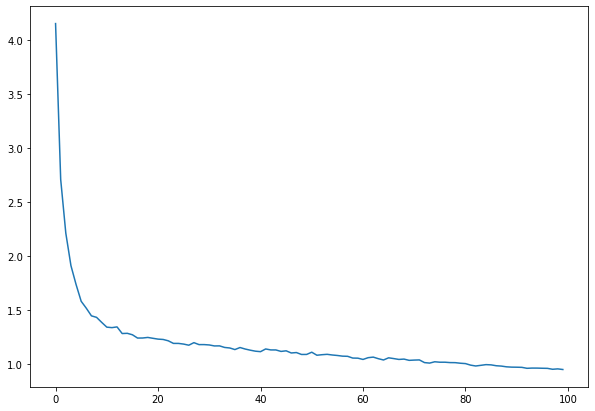

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
#ax.plot(epoch,val_loss)
plt.plot(df.epoch,df.train_loss)
#plt.plot(epoch,val_loss)
plt.show()

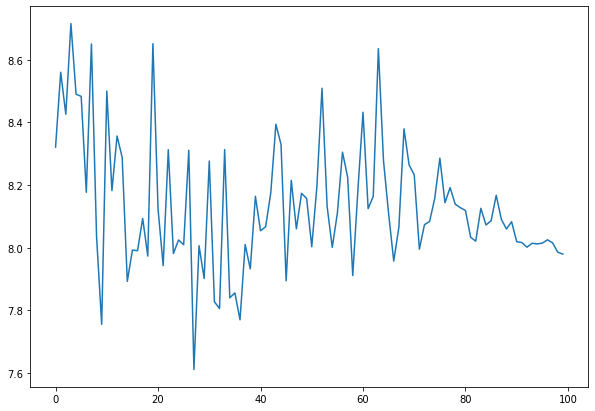

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
#plt.plot(df.epoch,df.train_loss)
plt.plot(df.epoch,df.test_loss)
plt.show()

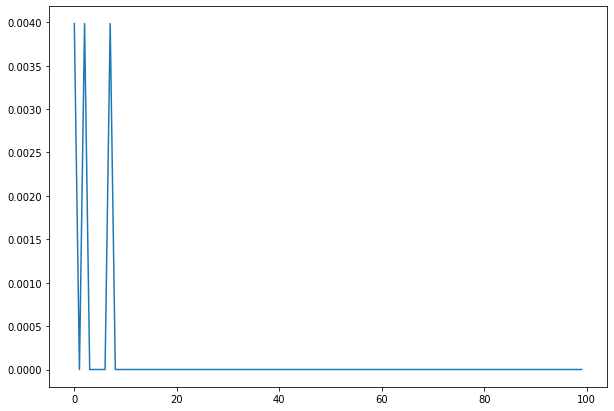

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
#plt.plot(df.epoch,df.train_loss)
plt.plot(df.epoch,df.metrics_accuracy_top1)
plt.show()

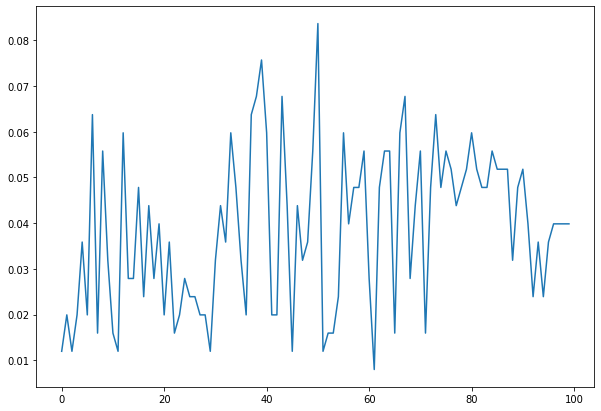

In [ ]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
#plt.plot(df.epoch,df.train_loss)
plt.plot(df.epoch,df.metrics_accuracy_top5)
plt.show()

In [ ]:
%cd ../yolov5
!python classify/train.py --model yolov5x-cls.pt --data $DATASET_NAME --epochs 300 --img 128 

/content/yolov5
classify/train: model=yolov5x-cls.pt, data=Cow-Identification-1, epochs=300, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=True, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=True, p=1.0, transpo

For some observation and experiments, we need to run 4-5 times with hypertuning(Hyperparameter tuning consists of finding a set of optimal hyperparameter values for a learning algorithm while applying this optimized algorithm to any data set. That combination of hyperparameters maximizes the model's performance, minimizing a predefined loss function to produce better results with fewer errors.)

In [ ]:
%cd ../yolov5
!python classify/train.py --model yolov5s-cls.pt --data $DATASET_NAME --epochs 600 --img 128 --pretrained weights/yolov5s-cls.pt

/content/yolov5
classify/train: model=yolov5s-cls.pt, data=Cow-Identification-1, epochs=600, batch_size=64, imgsz=128, nosave=False, cache=None, device=, workers=8, project=runs/train-cls, name=exp, exist_ok=False, pretrained=weights/yolov5s-cls.pt, optimizer=Adam, lr0=0.001, decay=5e-05, label_smoothing=0.1, cutoff=None, dropout=None, verbose=False, seed=0, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-38-g4362372 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

TensorBoard: Start with 'tensorboard --logdir runs/train-cls', view at http://localhost:6006/
albumentations: RandomResizedCrop(p=1.0, height=128, width=128, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1), HorizontalFlip(p=0.5), ColorJitter(p=0.5, brightness=[0.6, 1.4], contrast=[0.6, 1.4], saturation=[0.6, 1.4], hue=[0, 0]), Normalize(p=1.0, mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0), ToTensorV2(always_apply=Tr

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
!python classify/val.py --weights runs/train-cls/exp/weights/best.pt --data ../datasets/$DATASET_NAME

[link text](https://)### Infer With Your Custom Model

In [ ]:
#Get the path of an image from the test or validation set
if os.path.exists(os.path.join(dataset.location, "test")):
  split_path = os.path.join(dataset.location, "test")
else:
  os.path.join(dataset.location, "valid")
example_class = os.listdir(split_path)[0]
example_image_name = os.listdir(os.path.join(split_path, example_class))[0]
example_image_path = os.path.join(split_path, example_class, example_image_name)
os.environ["TEST_IMAGE_PATH"] = example_image_path

print(f"Inferring on an example of the class '{example_class}'")

#Infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source $TEST_IMAGE_PATH

We can see the inference results show ~3ms inference and the respective classes predicted probabilities.

## Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
# # Upload example image
project.upload(image_path)


In [ ]:
# # Example upload code 
min_conf = float("inf")
 for pred in results:
     if pred["score"] < min_conf:
         min_conf = pred["score"]
 if min_conf < 0.4:
     project.upload(image_path)

# YOLOv5 classify/predict.py Accepts Several Input Methods
- Webcam: `python classify/predict.py --weights yolov5s-cls.pt --source 0`
- Image `python classify/predict.py --weights yolov5s-cls.pt --source img.jpg`
- Video: `python classify/predict.py --weights yolov5s-cls.pt --source vid.mp4`
- Directory: `python classify/predict.py --weights yolov5s-cls.pt --source path/`
- Glob: `python classify/predict.py --weights yolov5s-cls.pt --source 'path/*.jpg'`
- YouTube: `python classify/predict.py --weights yolov5s-cls.pt --source 'https://youtu.be/Zgi9g1ksQHc'`
- RTSP, RTMP, HTTP stream: `python classify/predict.py --weights yolov5s-cls.pt --source 'rtsp://example.com/media.mp4'`

###Directory Example

In [ ]:
#Directory infer
os.environ["TEST_CLASS_PATH"] = test_class_path = os.path.join(*os.environ["TEST_IMAGE_PATH"].split(os.sep)[:-1])
print(f"Infering on all images from the directory {os.environ['TEST_CLASS_PATH']}")
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source /$TEST_CLASS_PATH/

###Video content Example

In [ ]:
#YouTube infer
!python classify/predict.py --weights runs/train-cls/exp/weights/best.pt --source 'https://www.youtube.com/watch?v=7AlYA4ItA74'